# Simple Approach to Multi-Label Classification

## 1. EDA

In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [12]:
data_path = r"C:\Users\sm185567\NBO_defects_2019.csv"

In [15]:
data_raw = pd.read_csv(data_path,encoding = 'ISO-8859-15')
#data_raw = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data_raw.shape

(810, 135)

In [16]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
printmd("**Sample data:**")
data_raw.head()

Number of rows in data = 810
Number of columns in data = 135




**Sample data:**

,Project,Key,Summary,Issue Type,Status,Priority,Resolution,Assignee,Reporter,Creator,...,Estimated Start Date,Escalated By?,Sprint,States / Sub States,Severity,Estimated Complete Date,Date Resolved,Date Verified,"Days In - Fixed, Awaiting Replication to Core",Days In - QA In Progress
0,NCR Back Office,NBO-18876,Ready To Groom:The core table ForecastDailyHis...,Bug,Not Started,P3,Unresolved,Michael D Humiston,Craig OKeeffe,Craig OKeeffe,...,NaN,NaN,NaN,NaN,S3,NaN,NaN,NaN,NaN,NaN
1,NCR Back Office,NBO-18875,An unwanted exception is being raised when use...,Bug,Not Started,P4,Unresolved,Michael D Humiston,Shaik Sunera Banu,Shaik Sunera Banu,...,NaN,NaN,NaN,NaN,S4,NaN,NaN,NaN,NaN,NaN
2,NCR Back Office,NBO-18856,Site cant make edit to the weekly inventory p...,Bug,In Analysis,P2,Unresolved,Michael D Humiston,Lo Kiatoukaysi,Lo Kiatoukaysi,...,NaN,NaN,NaN,NaN,S3,NaN,NaN,NaN,NaN,NaN
3,NCR Back Office,NBO-18855,Error when creating or changing an DM export,Bug,Withdrawn,P1,Cancelled,Michael D Humiston,Ruth Jones,Ruth Jones,...,NaN,NaN,NaN,NaN,S1,NaN,NaN,NaN,NaN,NaN
4,NCR Back Office,NBO-18827,Sales & Tips orphaned when changing time for s...,Bug,Ready For Dev,P3,Unresolved,Sunil Kumar Goli,Keith Sulesky,Keith Sulesky,...,NaN,NaN,NBO 20.6.2,NaN,S3,NaN,NaN,NaN,NaN,NaN


In [20]:
data_raw=data_raw[['Summary','Priority','Severity']]

### 1.1. Checking for missing values

In [21]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

Summary     1
Priority    1
Severity    1
dtype: int64


In [27]:
list(data_raw.columns.values)

['Summary', 'Priority', 'Severity']

### 1.2. Calculating number of comments under each label

In [28]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  810
Number of clean comments =  1
Number of comments with labels = 809


In [30]:
categories = list(data_raw.columns.values)
categories = categories[1:]
print(categories)

['Priority', 'Severity']


In [31]:
categories

['Priority', 'Severity']

In [33]:
data_raw['Priority'].sum()

TypeError: can only concatenate str (not "int") to str

In [32]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

TypeError: can only concatenate str (not "int") to str

In [35]:
categories

['Priority', 'Severity']

In [34]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

KeyError: 'Priority'

<Figure size 1080x576 with 0 Axes>

### 1.3. Calculating number of comments having multiple labels

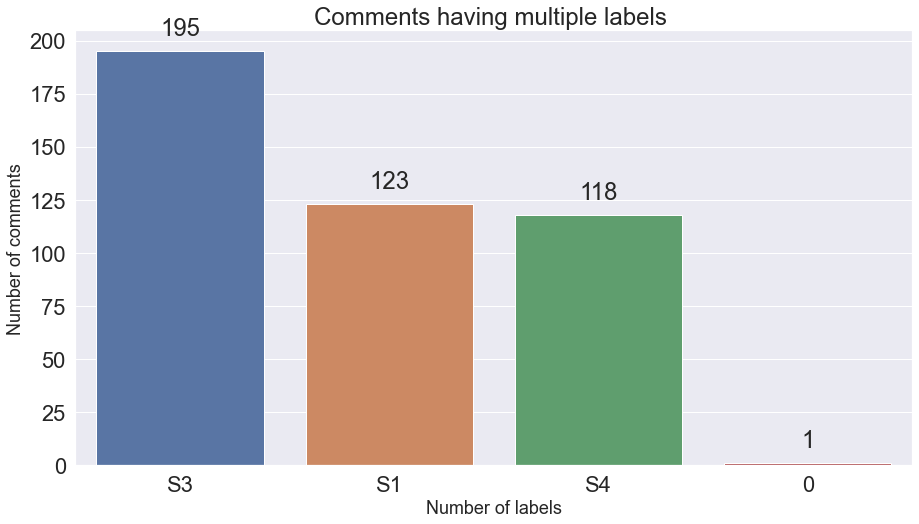

In [36]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### 1.4. WordCloud representation of most used words in each category of comments

In [58]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# toxic
subset = data_raw[data_raw.Priority==1]
text = subset.Summary.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Priority",fontsize=40)
plt.imshow(cloud_toxic)


# severe_toxic
subset = data_raw[data_raw.Severity==1]
text = subset.Summary.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Severity",fontsize=40)
plt.imshow(cloud_severe_toxic)




plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

<Figure size 2880x1800 with 0 Axes>

## 2. Data Pre-Processing

In [38]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

(2000, 3)

In [39]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### 2.1. Cleaning Data

In [40]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [43]:
data['Summary'] = data['Summary'].str.lower()
data['Summary'] = data['Summary'].apply(cleanHtml)
data['Summary'] = data['Summary'].apply(cleanPunc)
data['Summary'] = data['Summary'].apply(keepAlpha)
data.head()

,Summary,Priority,Severity
182,nbo add validation to prevent recipes with ci...,P1,S2
4,sales tips orphaned when changing time for s...,P3,S3
768,non cycle menu cycle site items on master msp...,P3,S3
374,apply to nbo forecasted guests in mp ar...,P1,S1
298,apply to nbo menu plan template is all...,P2,S2


### 2.2. Removing Stop Words

In [45]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['Summary'] = data['Summary'].apply(removeStopWords)
data.head()

,Summary,Priority,Severity
182,nbo add validation prevent recipes circular...,P1,S2
4,sales tips orphaned changing time jobs ...,P3,S3
768,non cycle menu cycle site items master msp ...,P3,S3
374,apply nbo forecasted guests mp chan...,P1,S1
298,apply nbo menu plan template allowed...,P2,S2


### 2.3. Stemming

In [46]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['Summary'] = data['Summary'].apply(stemming)
data.head()

,Summary,Priority,Severity
182,nbo add valid prevent recip circular refer,P1,S2
4,sale tip orphan chang time job singl shift mer...,P3,S3
768,non cycl menu cycl site item master msp usag p...,P3,S3
374,appli nbo forecast guest mp chang zero,P1,S1
298,appli nbo menu plan templat allow appli past m...,P2,S2


### 2.4. Train-Test Split

In [47]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1400, 3)
(600, 3)


In [48]:
train_text = train['Summary']
test_text = test['Summary']

### 2.5. TF-IDF

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [50]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['Summary'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['Summary'], axis=1)

## 3. Multi-Label Classification

### 3.1. Multiple Binary Classifications - (One Vs Rest Classifier)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [61]:
train['Priority'] = train['Priority'].astype(str)

In [63]:
train['Severity'] = train['Severity'].astype(str)

In [64]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing Priority comments...**

Test accuracy is 0.8633333333333333




**Processing Severity comments...**

Test accuracy is 0.8816666666666667


Wall time: 2.04 s


In [65]:
prediction

array(['S2', 'S2', 'S1', 'S2', 'S2', 'S2', 'S1', 'S2', 'S1', 'S2', 'S2',
       'S2', 'S2', 'S2', 'S4', 'S2', 'S1', 'S1', 'S2', 'S4', 'S2', 'S3',
       'S2', 'S2', 'S2', 'S2', 'S3', 'S3', 'S2', 'S2', 'S4', 'S3', 'S2',
       'S2', 'S3', 'S4', 'S1', 'S3', 'S2', 'S2', 'S2', 'S2', 'S2', 'S1',
       'S4', 'S2', 'S2', 'S4', 'S2', 'S4', 'S3', 'S2', 'S2', 'S2', 'S2',
       'S3', 'S2', 'S3', 'S2', 'S2', 'S2', 'S3', 'S4', 'S1', 'S3', 'S3',
       'S3', 'S2', 'S1', 'S4', 'S3', 'S2', 'S4', 'S3', 'S2', 'S2', 'S3',
       'S4', 'S2', 'S4', 'S2', 'S2', 'S2', 'S1', 'S2', 'S2', 'S2', 'S4',
       'S1', 'S2', 'S3', 'S2', 'S4', 'S2', 'S2', 'S2', 'S2', 'S2', 'S1',
       'S4', 'S2', 'S2', 'S2', 'S2', 'S2', 'S3', 'S3', 'S2', 'S2', 'S3',
       'S2', 'S2', 'S2', 'S2', 'S3', 'S3', 'S3', 'S3', 'S2', 'S1', 'S2',
       'S2', 'S1', 'S2', 'S2', 'S2', 'S2', 'S2', 'S1', 'S4', 'S2', 'S2',
       'S2', 'S1', 'S3', 'S3', 'S2', 'S3', 'S1', 'S1', 'S2', 'S2', 'S3',
       'S2', 'S1', 'S4', 'S3', 'S3', 'S4', 'S2', 'S

### 3.2. Multiple Binary Classifications - (Binary Relevance)

In [66]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

TypeError: no supported conversion for types: (dtype('O'),)

### 3.3. Classifier Chains

In [26]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [27]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8933333333333333


CPU times: user 6.2 s, sys: 2.52 s, total: 8.72 s
Wall time: 8.64 s


### 3.4. Label Powerset

In [28]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [29]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8933333333333333


CPU times: user 550 ms, sys: 209 ms, total: 759 ms
Wall time: 662 ms


### 3.5. Adapted Algorithm

In [30]:
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [31]:
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")

Accuracy =  0.8816666666666667


CPU times: user 2min 28s, sys: 839 ms, total: 2min 29s
Wall time: 2min 29s
